### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
csv_file = "C:\\Users\\cpwil\\Desktop\\Spring 2024\\IST 707 - Applied Machine Learning\\Warm Up Data\\2019_Yellow_Taxi_Trip_Data.csv"
taxidf = pd.read_csv(csv_file)
print(taxidf.head())

   vendorid     tpep_pickup_datetime    tpep_dropoff_datetime  \
0         2  2019-10-23T16:39:42.000  2019-10-23T17:14:10.000   
1         1  2019-10-23T16:32:08.000  2019-10-23T16:45:26.000   
2         2  2019-10-23T16:08:44.000  2019-10-23T16:21:11.000   
3         2  2019-10-23T16:22:44.000  2019-10-23T16:43:26.000   
4         2  2019-10-23T16:45:11.000  2019-10-23T16:58:49.000   

   passenger_count  trip_distance  ratecodeid store_and_fwd_flag  \
0                1           7.93           1                  N   
1                1           2.00           1                  N   
2                1           1.36           1                  N   
3                1           1.00           1                  N   
4                1           1.96           1                  N   

   pulocationid  dolocationid  payment_type  fare_amount  extra  mta_tax  \
0           138           170             1         29.5    1.0      0.5   
1            11            26             1     

### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [3]:
print(taxidf.shape)

(10000, 18)


#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [4]:
taxidf[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()


,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 4

Count the number of NAs in each column.

In [5]:
missing_values = taxidf.isna().sum()
print(missing_values)

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

In [6]:
taxidf["passenger_count"].value_counts()
print(taxidf.columns)
dropcols = ['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pulocationid','ratecodeid', 'dolocationid', 'payment_type', 'store_and_fwd_flag', 'mta_tax', 'improvement_surcharge']




Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [7]:
target = taxidf.drop(columns=dropcols)
print(target.head())



   passenger_count  trip_distance  fare_amount  extra  tip_amount  \
0                1           7.93         29.5    1.0        7.98   
1                1           2.00         10.5    1.0        0.00   
2                1           1.36          9.5    1.0        2.00   
3                1           1.00         13.0    1.0        4.32   
4                1           1.96         10.5    1.0        0.50   

   tolls_amount  total_amount  congestion_surcharge  
0          6.12         47.90                   2.5  
1          0.00         12.30                   0.0  
2          0.00         15.80                   2.5  
3          0.00         21.62                   2.5  
4          0.00         15.30                   2.5  


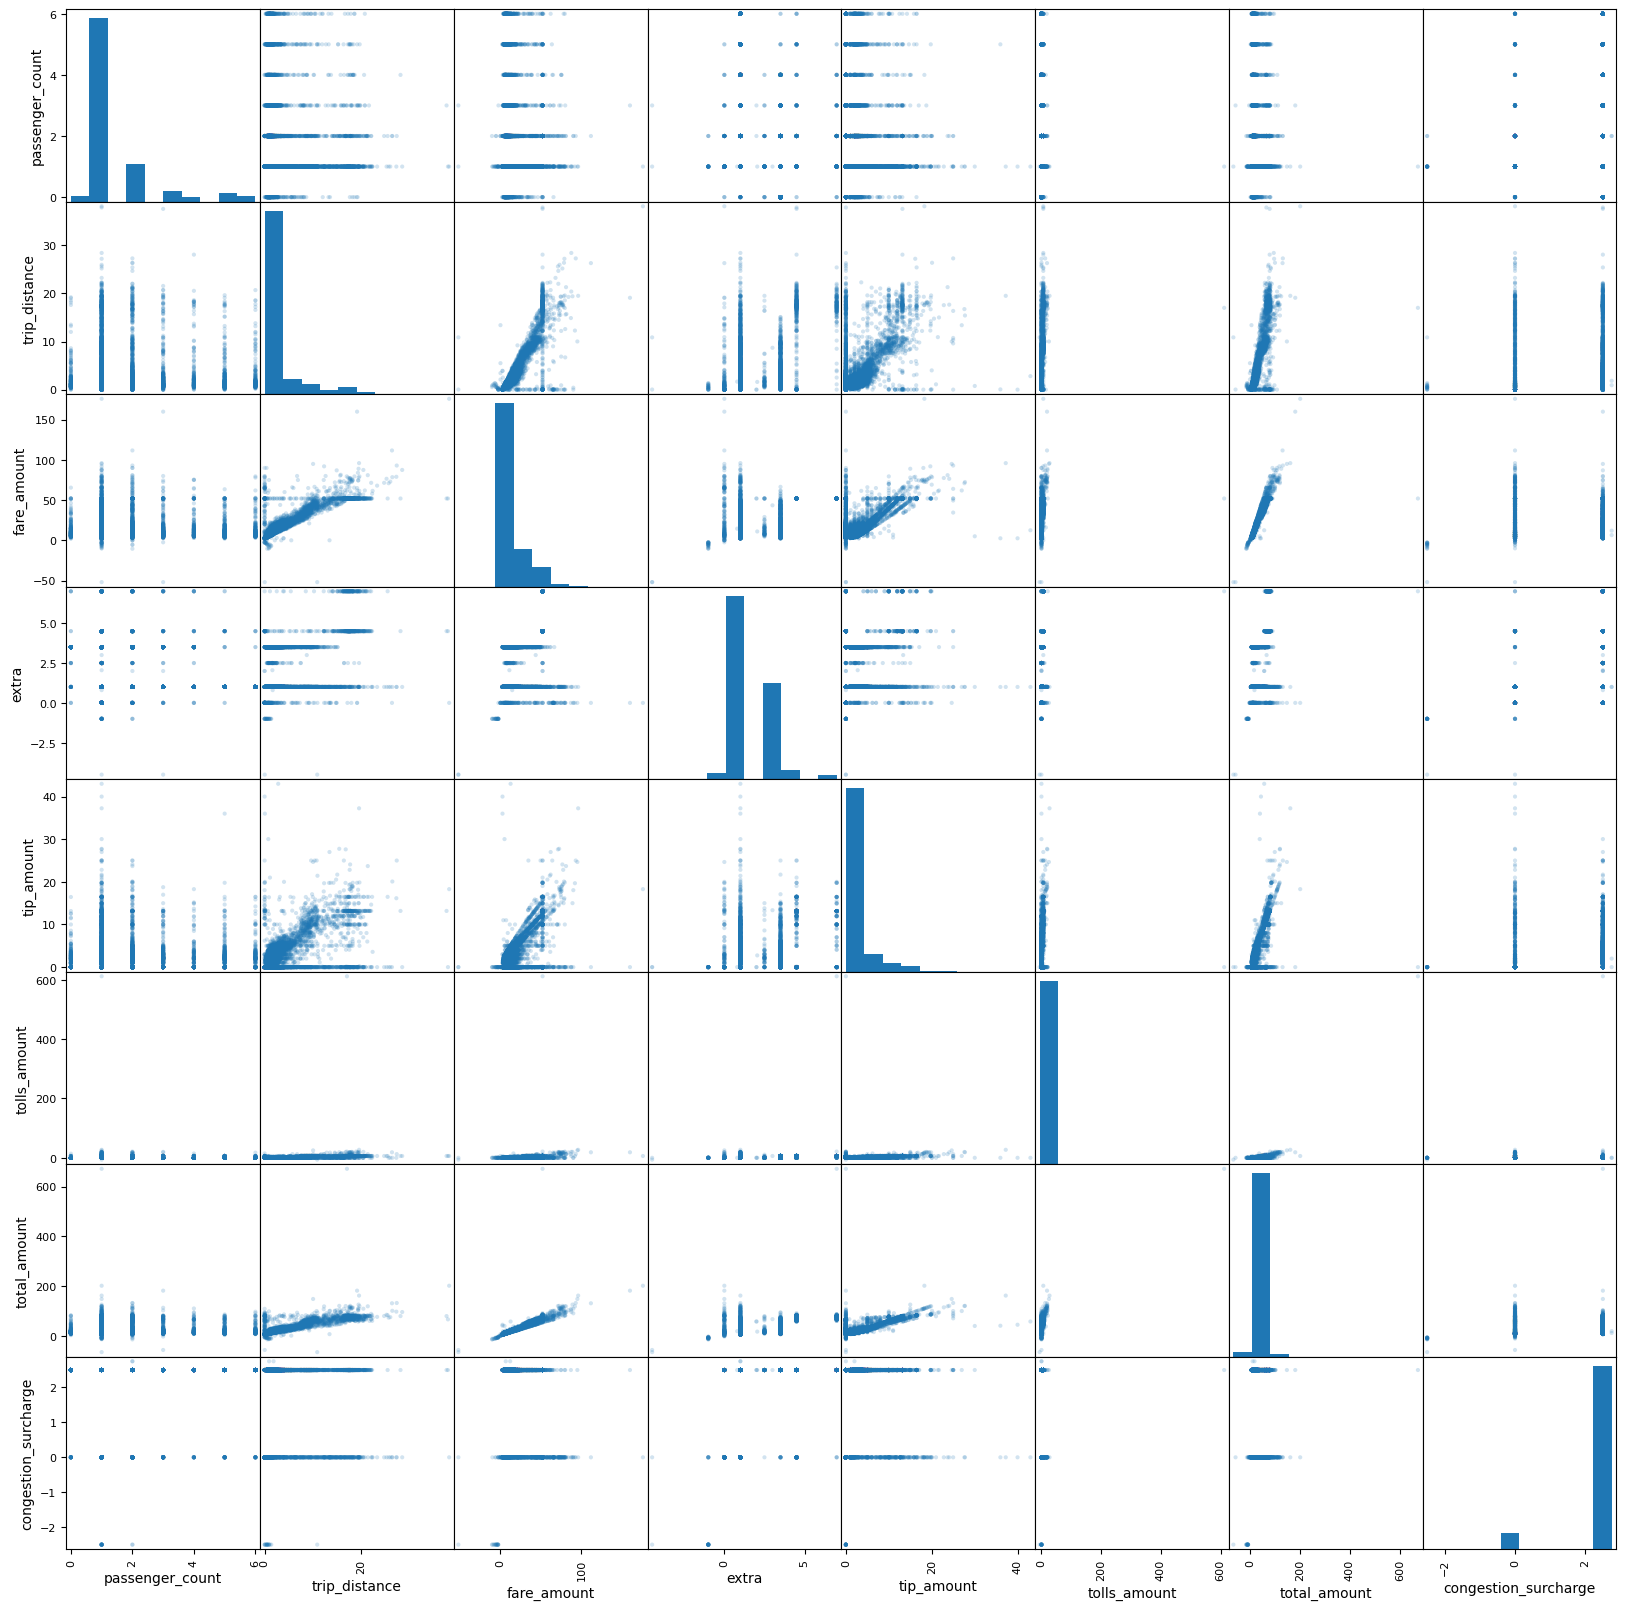

In [8]:
scatter_matrix(target, alpha=0.2, figsize=(20, 20), diagonal='hist')
plt.show()

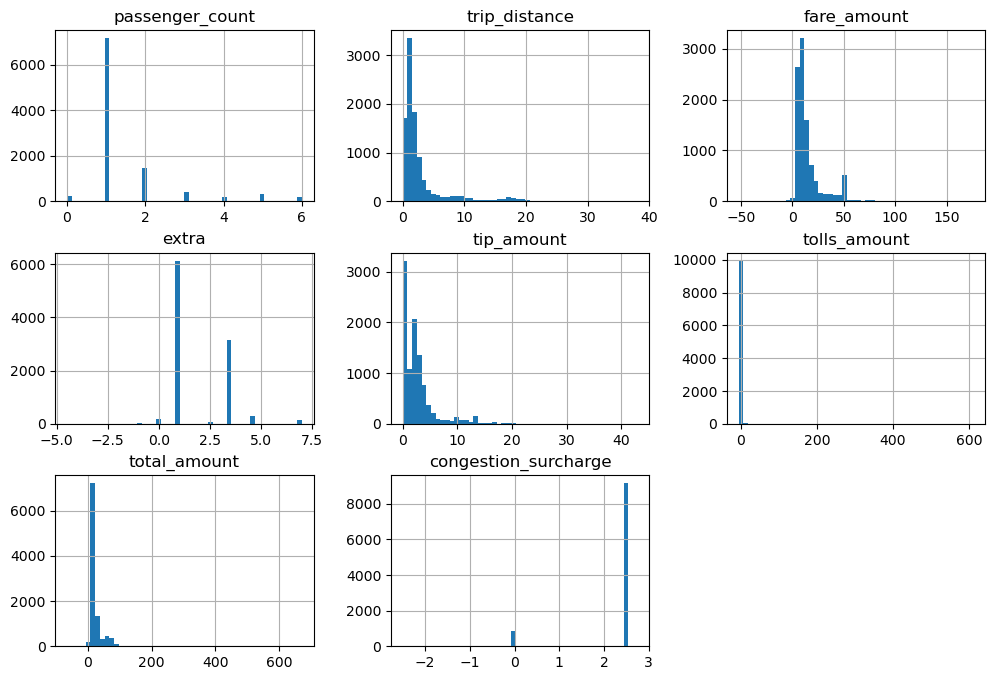

In [9]:
target.hist(bins=50, figsize=(12, 8))
plt.show()

#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

We can tell that there are outliers since the std is high, there is wide variation in the min and max values with 50% of the data contained from 12.37 to 22.88. The mean is 22.565 while the max value is 671.8 indicating there may be a heavy right skew. 

count    10000.000000
mean        22.564659
std         19.209255
min        -65.920000
25%         12.375000
50%         16.300000
75%         22.880000
max        671.800000
Name: total_amount, dtype: float64


<Axes: >

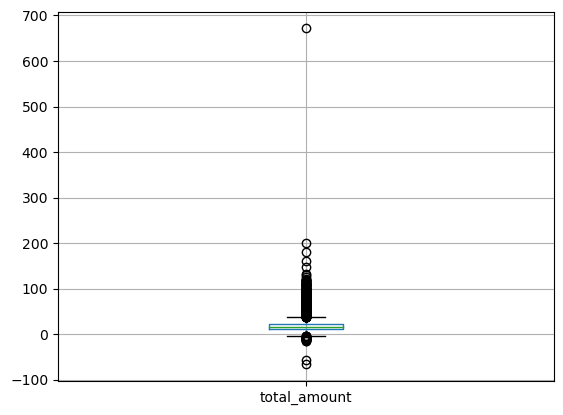

In [11]:
inv_total_amt =taxidf['total_amount'].describe()
print(inv_total_amt)

taxidf.boxplot("total_amount")

#### Exercise 7

Use a logistic regression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

subset_features = ['trip_distance', 'mta_tax', 'tolls_amount', 'congestion_surcharge', 'vendorid', 'passenger_count', 'trip_distance', 'pulocationid', 'dolocationid', 'payment_type','extra', 'improvement_surcharge']
prediction = 'fare_amount'

x= taxidf[subset_features]
y = taxidf[prediction]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50) 
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 31.67910035101102


#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?

The mse from the decision tree is smaller and suggests the model may be a better fit. by order or magnitude both have large mse's

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

x = taxidf[subset_features]
y= taxidf[prediction]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=60)

decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)
y_prediction_tree = decision_tree_model.predict(x_test)
mse_Decision = mean_squared_error(y_test, y_prediction_tree)
print(f'Mean Squared Error: {mse_Decision}')
#

Mean Squared Error: 21.03092737962018
